# Disney Plus data
---
## by Irem Arici

*October 2023*

---
**data obtained from https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("disney_plus_titles.csv")

## Getting to know the data
---
The 12 columns are 'show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description'.

There are 1444 (originally 1450) entries.

Except for release year, all of the columns are of the type object

In [3]:
df.shape  # 1450 entries, 12 columns, after dropping 1444 left

(1450, 12)

In [4]:
df.dtypes # release_year     int64!

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

## Dealing with missing values
___

Let's see how many missing values we have

In [6]:
df.isnull().sum()   # there are 473 missing values for director
                    # 190 for cast, and 219 for country. 
                    # also some values are missing in rating (3)
                    # and date_added (3)

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

### I drop these 2 missing values, *date_added* and *rating*, since there are small in size

In [7]:
df.dropna(subset=["date_added", "rating"], inplace= True)

In [8]:
print("Missing values in {} is: ".format("date added"),df["date_added"].isnull().sum())
print("Missing values in {} is: ".format("rating"), df["rating"].isnull().sum())

Missing values in date added is:  0
Missing values in rating is:  0


### Since other missing values in *director*, *country* and *cast* columns are too many to drop them, I fill those missing values with Unknown 

In [9]:
df['director'].fillna("Unknown", inplace=True)
print("Missing values of {} is: ".format("director"), df["director"].isnull().sum())

df["country"].fillna("Unknown", inplace=True)
print("Missing values of {} is: ".format("country"), df["country"].isnull().sum())

df["cast"].fillna("Unknown", inplace=True)
print("Missing values of {} is: ".format("cast"), df["cast"].isnull().sum())

Missing values of director is:  0
Missing values of country is:  0
Missing values of cast is:  0


**Check remaining missing values:**

In [10]:
df.isnull().sum() # no mo missing values!

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Dealing with variables

### let's see the date_added column 

In [11]:
df["date_added"].head()

0    November 26, 2021
1    November 26, 2021
2    November 26, 2021
3    November 26, 2021
5    November 24, 2021
Name: date_added, dtype: object

In [12]:
df["year_added"] = df["date_added"].apply(lambda x: x[-5:])
df["year_added"].value_counts() 

 2019    765
 2020    352
 2021    327
Name: year_added, dtype: int64

### Since the platform is relatively new, year_added includes 2019, 2020, and 2021. Let's explore release year:

In [13]:
df["release_year"].value_counts() # there are 90 year values in the dataset

2021    123
2020    114
2019     98
2017     69
2018     65
       ... 
1928      1
1944      1
1970      1
1945      1
1968      1
Name: release_year, Length: 90, dtype: int64

In [14]:
sorted(df["release_year"].unique(), reverse = True)  #The oldest year is 1928, and the newest is 2021

[2021,
 2020,
 2019,
 2018,
 2017,
 2016,
 2015,
 2014,
 2013,
 2012,
 2011,
 2010,
 2009,
 2008,
 2007,
 2006,
 2005,
 2004,
 2003,
 2002,
 2001,
 2000,
 1999,
 1998,
 1997,
 1996,
 1995,
 1994,
 1993,
 1992,
 1991,
 1990,
 1989,
 1988,
 1987,
 1986,
 1985,
 1984,
 1983,
 1982,
 1981,
 1980,
 1979,
 1978,
 1977,
 1976,
 1975,
 1974,
 1973,
 1972,
 1971,
 1970,
 1969,
 1968,
 1967,
 1966,
 1965,
 1964,
 1963,
 1962,
 1961,
 1960,
 1959,
 1957,
 1956,
 1955,
 1954,
 1953,
 1952,
 1951,
 1950,
 1949,
 1948,
 1947,
 1946,
 1945,
 1944,
 1943,
 1942,
 1941,
 1940,
 1939,
 1938,
 1937,
 1936,
 1935,
 1934,
 1933,
 1932,
 1928]

### We are also interested in listings

In [15]:
df["listed_in"].value_counts() # the categories are too long

Animation, Comedy, Family                        124
Action-Adventure, Animation, Comedy               77
Action-Adventure, Animation, Kids                 45
Animals & Nature, Documentary, Family             40
Action-Adventure, Animation, Family               40
                                                ... 
Biographical, Coming of Age, Drama                 1
Docuseries, Family, Lifestyle                      1
Comedy, Fantasy, Romance                           1
Buddy, Comedy, Drama                               1
Action-Adventure, Animals & Nature, Animation      1
Name: listed_in, Length: 328, dtype: int64

### Since there are too many genres in *listed_in* column, I transformed them into dummy variables, and dropped the original column

In [16]:
df['genres'] = df['listed_in'].str.split(', ')
genre_dummies = df['genres'].str.join('|').str.get_dummies()
df = pd.concat([df, genre_dummies], axis=1)
df.drop(['listed_in', 'genres'], axis=1, inplace=True)
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'description', 'year_added',
       'Action-Adventure', 'Animals & Nature', 'Animation', 'Anime',
       'Anthology', 'Biographical', 'Buddy', 'Comedy', 'Coming of Age',
       'Concert Film', 'Crime', 'Dance', 'Disaster', 'Documentary',
       'Docuseries', 'Drama', 'Family', 'Fantasy', 'Game Show / Competition',
       'Historical', 'Kids', 'Lifestyle', 'Medical', 'Movies', 'Music',
       'Musical', 'Mystery', 'Parody', 'Police/Cop', 'Reality', 'Romance',
       'Romantic Comedy', 'Science Fiction', 'Series',
       'Soap Opera / Melodrama', 'Sports', 'Spy/Espionage', 'Superhero',
       'Survival', 'Talk Show', 'Thriller', 'Travel', 'Variety', 'Western'],
      dtype='object')

Let's see countries now

In [17]:
df["country"].value_counts() 

United States                                                  1003
Unknown                                                         216
United States, Canada                                            30
United Kingdom                                                   23
United States, United Kingdom                                    22
                                                               ... 
Ireland, United States                                            1
Ireland, United Kingdom, United States, South Korea, Canada       1
United States, South Korea, France                                1
United States, Australia, France, Canada                          1
United States, Ireland                                            1
Name: country, Length: 90, dtype: int64

### there are both countries that are unique and collaborative movies, let's pick the primary one for our analysis

In [18]:
df["primary_country"] = df["country"].apply(lambda x: str(x).split(",")[0])
df["primary_country"].value_counts()
df["primary_country"].nunique()

18

 ### now there are only 18 unique countries in the data

In [19]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'description', 'year_added',
       'Action-Adventure', 'Animals & Nature', 'Animation', 'Anime',
       'Anthology', 'Biographical', 'Buddy', 'Comedy', 'Coming of Age',
       'Concert Film', 'Crime', 'Dance', 'Disaster', 'Documentary',
       'Docuseries', 'Drama', 'Family', 'Fantasy', 'Game Show / Competition',
       'Historical', 'Kids', 'Lifestyle', 'Medical', 'Movies', 'Music',
       'Musical', 'Mystery', 'Parody', 'Police/Cop', 'Reality', 'Romance',
       'Romantic Comedy', 'Science Fiction', 'Series',
       'Soap Opera / Melodrama', 'Sports', 'Spy/Espionage', 'Superhero',
       'Survival', 'Talk Show', 'Thriller', 'Travel', 'Variety', 'Western',
       'primary_country'],
      dtype='object')

Let's continue with duration column, it seems that the columns is a string, let's change it into numerical feature

In [20]:
df["duration"] 

0        23 min
1        91 min
2        23 min
3        41 min
5        94 min
         ...   
1445    108 min
1446    106 min
1447    107 min
1448    112 min
1449      2 min
Name: duration, Length: 1444, dtype: object

In [43]:
df["duration_min"] = df["duration"].apply(lambda x: int(x.split(" ")[0]))
df.duration_min

0        23
1        91
2        23
3        41
5        94
       ... 
1445    108
1446    106
1447    107
1448    112
1449      2
Name: duration_min, Length: 1444, dtype: int64

In [54]:
""
df["duration_len"] = df["duration_min"].apply(lambda x: x > 60,
                                            "1 hour and longer",
                                            else:
                                              "shorter than 1 hour")
""

'\ndf["duration_len"] = df["duration_min"].apply(lambda x: x > 60,\n                                            "1 hour and longer",\n                                            else:\n                                              "shorter than 1 hour")\n'

In [22]:
dur_order = sorted(df["duration_min"])

# Exploring the data (visually)

First, let's do some imports

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn
%matplotlib inline

In [24]:
categorical = df.select_dtypes("object")

In [25]:
categorical.columns #['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
                    # 'rating', 'duration', 'listed_in', 'description']

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'rating', 'duration', 'description', 'year_added', 'primary_country',
       'duration_min'],
      dtype='object')

Duration

## Type & year
---
### There are more movies in the platform than tv shows

Text(0.5, 1.0, 'Content according to their type and year added')

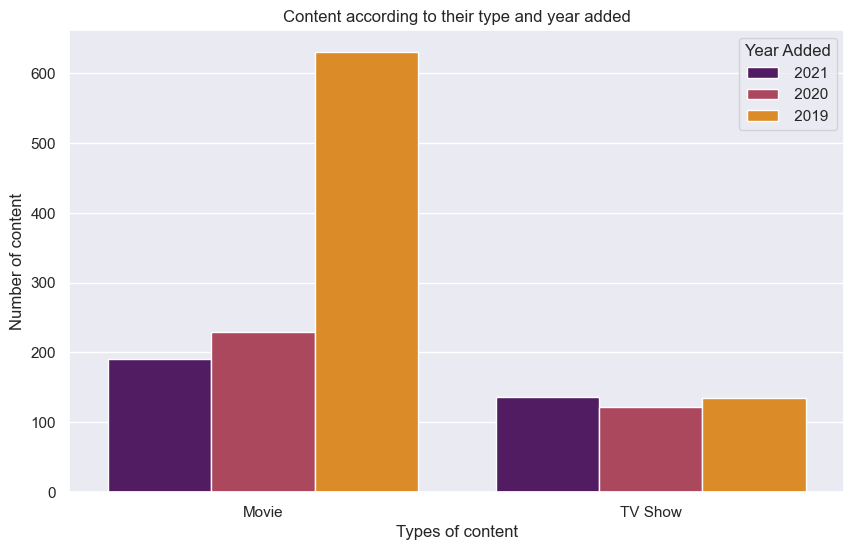

In [94]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(x = "type", data = df, hue="year_added", palette="inferno")
plt.legend(title="Year Added")
plt.xlabel("Types of content")
plt.ylabel("Number of content")
plt.title("Content according to their type and year added")

## Countries
---
### Let's see which countries are leading:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Unknown'),
  Text(1, 0, 'United States'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'Ireland'),
  Text(4, 0, 'France'),
  Text(5, 0, 'United Kingdom'),
  Text(6, 0, 'South Korea'),
  Text(7, 0, 'Australia'),
  Text(8, 0, 'Austria'),
  Text(9, 0, 'Argentina'),
  Text(10, 0, 'United Arab Emirates'),
  Text(11, 0, 'India'),
  Text(12, 0, 'Germany'),
  Text(13, 0, 'Tanzania'),
  Text(14, 0, 'Denmark'),
  Text(15, 0, 'Norway'),
  Text(16, 0, 'China'),
  Text(17, 0, 'New Zealand')])

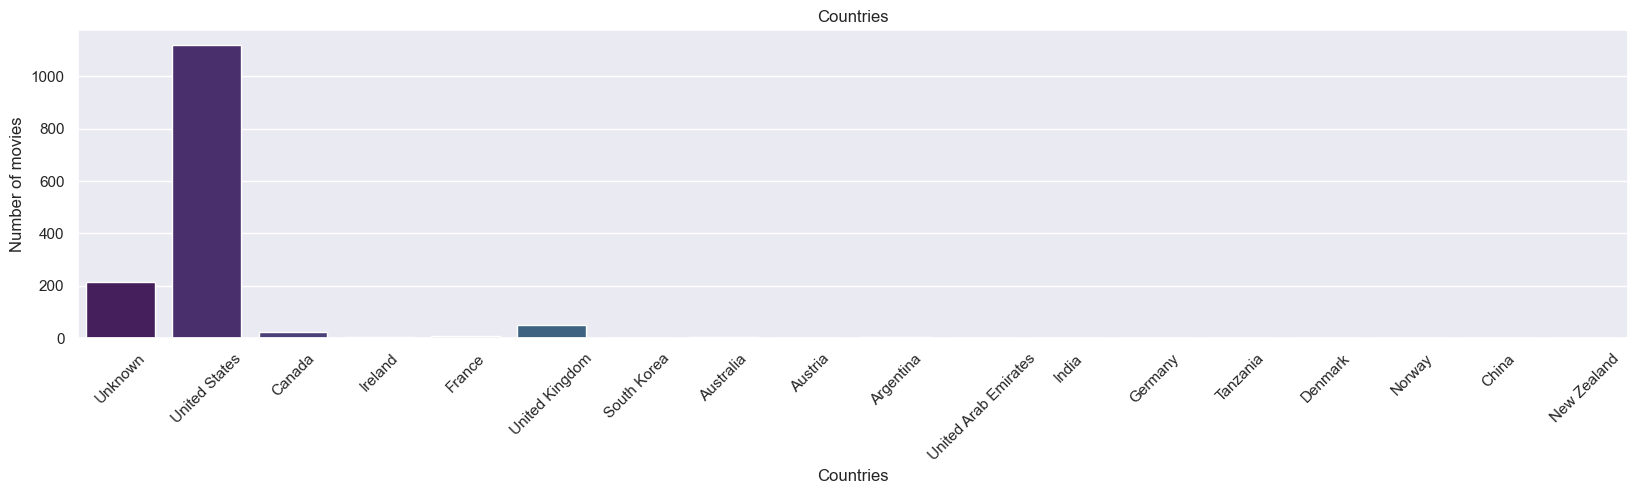

In [99]:
plt.figure(figsize=(20,4))
sns.countplot(x = "primary_country", data =df, palette="viridis")
plt.xlabel("Countries")
plt.ylabel("Number of movies")
plt.title("Countries")
plt.xticks(rotation = 45) ## US is the winner, along with unknown so lets drop them and see again

In [76]:
df["_country"] = df["primary_country"].loc[~df["primary_country"].isin(["United States", "Unknown"])]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Canada'),
  Text(1, 0, 'Ireland'),
  Text(2, 0, 'France'),
  Text(3, 0, 'United Kingdom'),
  Text(4, 0, 'South Korea'),
  Text(5, 0, 'Australia'),
  Text(6, 0, 'Austria'),
  Text(7, 0, 'Argentina'),
  Text(8, 0, 'United Arab Emirates'),
  Text(9, 0, 'India'),
  Text(10, 0, 'Germany'),
  Text(11, 0, 'Tanzania'),
  Text(12, 0, 'Denmark'),
  Text(13, 0, 'Norway'),
  Text(14, 0, 'China'),
  Text(15, 0, 'New Zealand')])

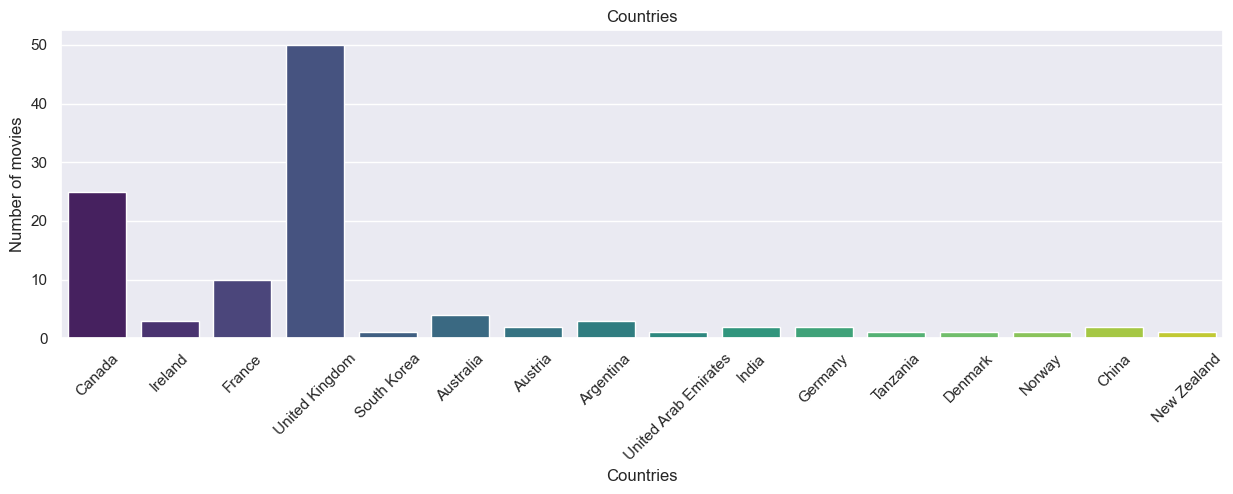

In [96]:
plt.figure(figsize=(15,4))
sns.countplot(x = df["_country"], palette="viridis")
plt.xlabel("Countries")
plt.ylabel("Number of movies")
plt.title("Countries")
plt.xticks(rotation = 45) ## so the other most-popular countries are UK and Canada

In [104]:
df["title"].nunique() # 1444 titles

1444

# Preprocessing & Modeling
---
So, I am interested in classification of genre to titles in a cluster, and here, I will apply K-means clustering to create 5 groups of genre and see which titles are clustered.

In [161]:
X = df[['Action-Adventure', 'Animals & Nature', 'Animation', 'Anime',
       'Anthology', 'Biographical', 'Buddy', 'Comedy', 'Coming of Age',
       'Concert Film', 'Crime', 'Dance', 'Disaster', 'Documentary',
       'Docuseries', 'Drama', 'Family', 'Fantasy', 'Game Show / Competition',
       'Historical', 'Kids', 'Lifestyle', 'Medical', 'Movies', 'Music',
       'Musical', 'Mystery', 'Parody', 'Police/Cop', 'Reality', 'Romance',
       'Romantic Comedy', 'Science Fiction', 'Series',
       'Soap Opera / Melodrama', 'Sports', 'Spy/Espionage', 'Superhero',
       'Survival', 'Talk Show', 'Thriller', 'Travel', 'Variety', 'Western']]

In [115]:
from sklearn.preprocessing import StandardScaler

### Normalizing data:

In [116]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Time for fitting:

In [117]:
from sklearn.cluster import KMeans

In [119]:
km = KMeans(n_clusters= 5, random_state=42) ## chose 5 as hyperparameter

In [120]:
km.fit(X_scaled)

/Users/iremarici/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [170]:
df['cluster_label'] = km.labels_ ## assigning cluster labels

In [125]:
cluster_counts = df['cluster_label'].value_counts()
cluster_counts

2    666
1    357
4    276
3     99
0     46
Name: cluster_label, dtype: int64

Text(0.5, 1.0, 'Distribution of Items in Clusters')

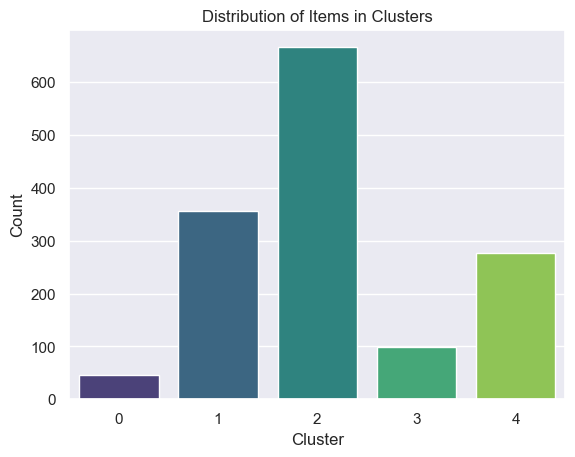

In [169]:
sns.countplot(data=df, x='cluster_label', palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of Items in Clusters')

In [168]:
for cluster_id in range(5):
    cluster_data = df[df['cluster_label'] == cluster_id]

In [167]:
genre_distribution = df.groupby('cluster_label')[['Action-Adventure', 'Animals & Nature', 'Animation', 'Anime',
       'Anthology', 'Biographical', 'Buddy', 'Comedy', 'Coming of Age',
       'Concert Film', 'Crime', 'Dance', 'Disaster', 'Documentary',
       'Docuseries', 'Drama', 'Family', 'Fantasy', 'Game Show / Competition',
       'Historical', 'Kids', 'Lifestyle', 'Medical', 'Movies', 'Music',
       'Musical', 'Mystery', 'Parody', 'Police/Cop', 'Reality', 'Romance',
       'Romantic Comedy', 'Science Fiction', 'Series',
       'Soap Opera / Melodrama', 'Sports', 'Spy/Espionage', 'Superhero',
       'Survival', 'Talk Show', 'Thriller', 'Travel', 'Variety', 'Western']].mean()

## Heatmap visualization of genre clusters

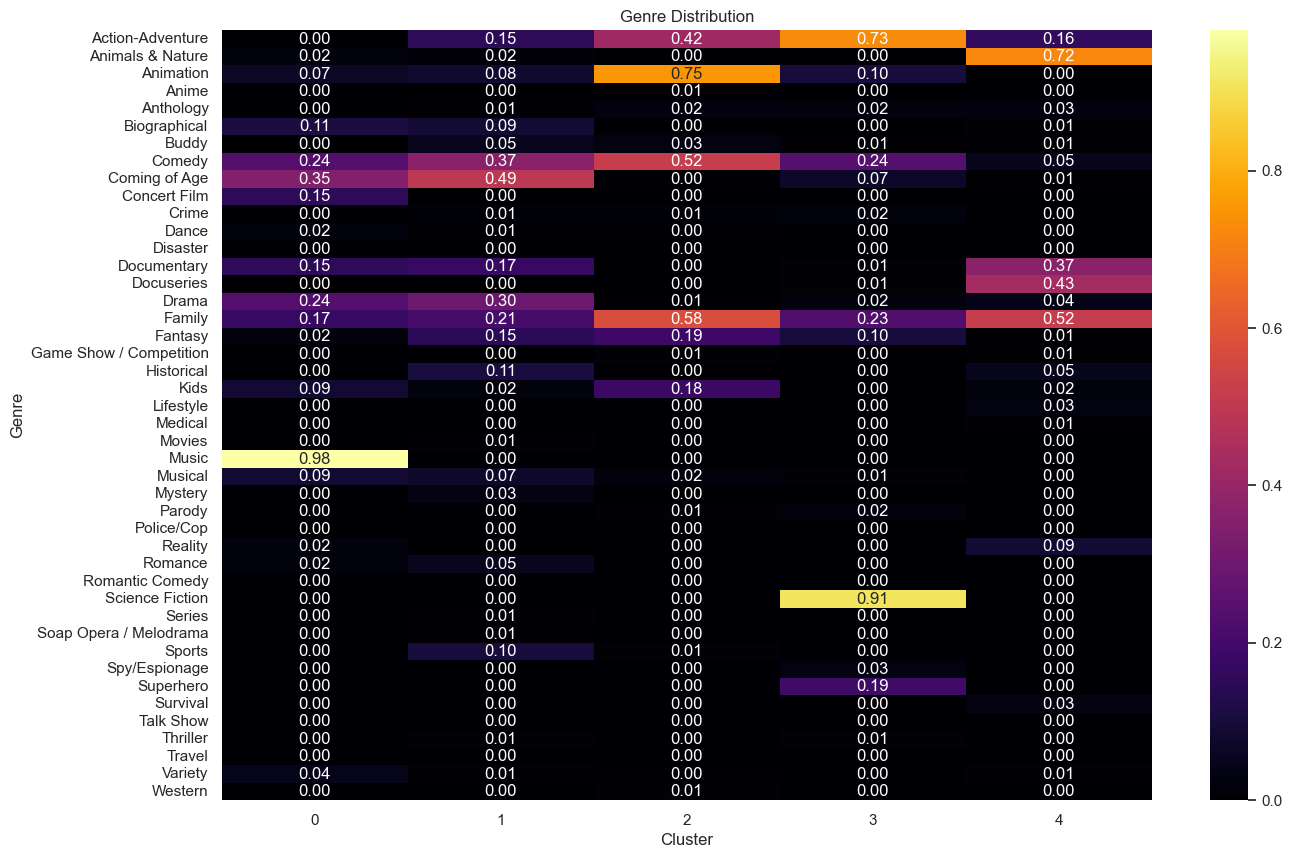

In [152]:
plt.figure(figsize=(15, 10))
sns.heatmap(genre_distribution.T, cmap='inferno', annot=True, fmt=".2f")
plt.xlabel('Cluster')
plt.ylabel('Genre')
plt.title('Genre Distribution')
plt.show()

## Some movies according to their clusters and descriptions

In [166]:
for cluster_id in range(5):
    cluster_data = df[df['cluster_label'] == cluster_id]
    
    print(f'Cluster {cluster_id}:')
    for _, row in cluster_data.sample(2).iterrows():
        print(f'Title: {row["title"]}')
        print(f'Description: {row["description"]}')
        print('---')

Cluster 0:
Title: Spin
Description: Rhea discovers her passion for creating DJ mixes!
---
Title: The Cheetah Girls: One World
Description: The Cheetah Girls are off to India to land a spot in a Bollywood musical.
---
Cluster 1:
Title: Marvel Studios’ 2021 Disney+ Day Special
Description: Marvel Studios’ Disney+ Day Special explores the Disney+ series of the MCU – past, present and future.
---
Title: Kim Possible Movie: So the Drama
Description: Kim's new campus crush distracts her from Dr. Drakken's latest evil plot.
---
Cluster 2:
Title: Beauty and the Beast: Belle's Magical World
Description: In three short stories, see Belle make a gloomy castle fit for a princess.
---
Title: Artemis Fowl
Description: A descendant of a long line of criminal masterminds seeks to find his father who has disappeared.
---
Cluster 3:
Title: Rolie Polie Olie
Description: Rolie Polie Olie’s life and adventures center on his Robo-family.
---
Title: Marvel Studios' Doctor Strange
Description: A famous surgeo

## Here is some of the films with regard to their cluster:

In [159]:
for cluster_id in range(5):
    cluster_data = df[df['cluster_label'] == cluster_id].sample(10)
    
    print("---")
    print(f'Cluster {cluster_id} Titles:')
    print("---")
    for title in cluster_data['title']:
        print(title)

---
Cluster 0 Titles:
---
The Mistle-Tones
Stuck in the Suburbs
The Making of Happier Than Ever: A Love Letter to Los Angeles
Happier Than Ever: A Love Letter to Los Angeles
Alvin and the Chipmunks: The Road Chip
Puppy for Hanukkah
Black Is King
Spin
Starstruck
High School Musical: The Musical: The Holiday Special
---
Cluster 1 Titles:
---
Bend It Like Beckham
The Big Green
Disney Under The Sea: A Descendants Short Story
Hannah Montana
Casebusters
Free Solo
First Kid
Viking Warrior Women
Good Luck Charlie
The Swap
---
Cluster 2 Titles:
---
Finding Dory
The Book of Life
You Again
Lifted
MUPPET BABIES
The Small One
Disney's Adventures Of The Gummi Bears
Dumbo
Hawaiian Holiday
Prep & Landing: Naughty vs. Nice
---
Cluster 3 Titles:
---
Obi-Wan Kenobi
Under the Helmet: The Legacy of Boba Fett
Tron
Marvel Studios' Guardians of the Galaxy Vol. 2
Fury Files
Marvel's Iron Man & Captain America: Heroes United
Marvel Rising: Battle of The Bands
Rolie Polie Olie
Marvel Studios' Black Panther
LEGO 